In [1]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/StanHub/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


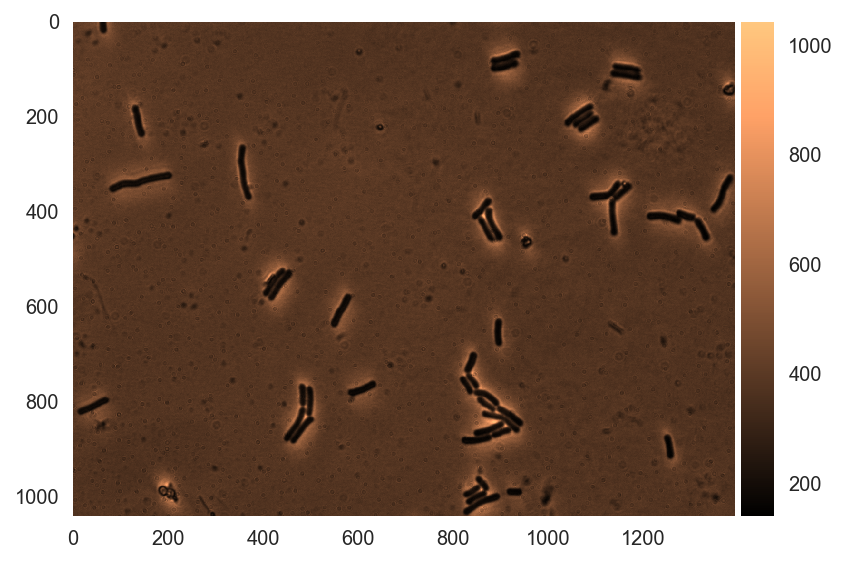

In [4]:
# Load the phase contrast image.
im_phase = skimage.io.imread('data/bsub_100x_phase.tif')

# Display the image, set Seaborn style 'dark' to avoid grid lines
with sns.axes_style('dark'):
    skimage.io.imshow(im_phase, cmap=plt.cm.copper)

The above example is called a "lookup table" where intensity is mapped to color.
Such as:
- Copper
- Gray

**Don't use JET**!  There is a false coloring at yellow which stands out.
Yellow very close to white.

Color maps can suggest features that aren't there.

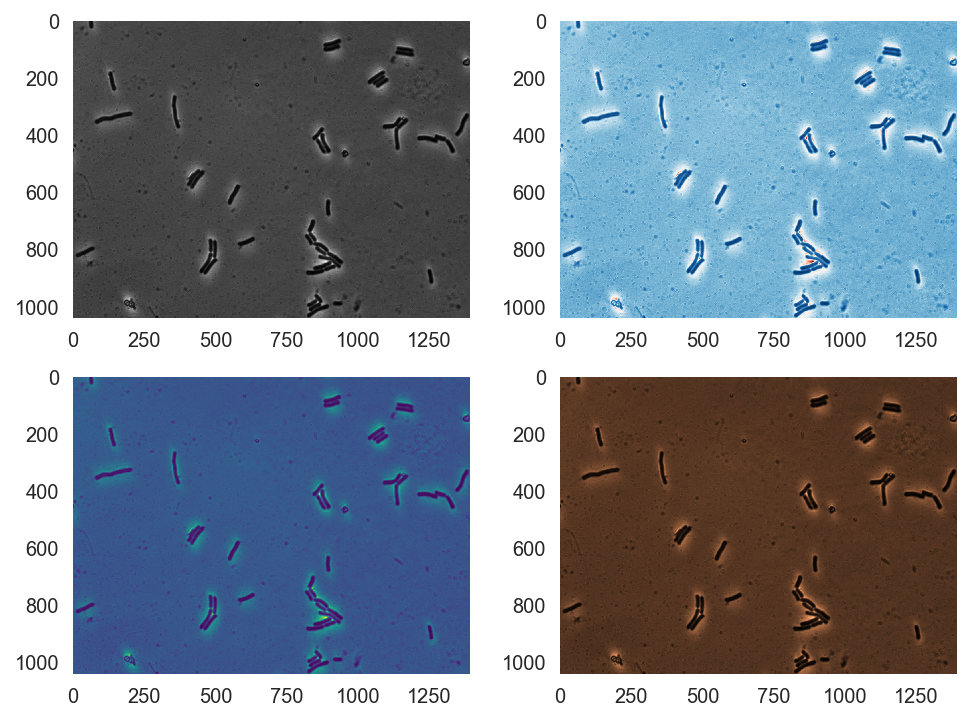

In [5]:
with sns.axes_style('dark'):
    # Get subplots
    fig, ax = plt.subplots(2, 2, figsize=(8,6))

    # Display various LUTs
    ax[0,0].imshow(im_phase, cmap=plt.cm.gray)
    ax[0,1].imshow(im_phase, cmap=plt.cm.RdBu_r)
    ax[1,0].imshow(im_phase, cmap=plt.cm.viridis)
    ax[1,1].imshow(im_phase, cmap=plt.cm.copper)

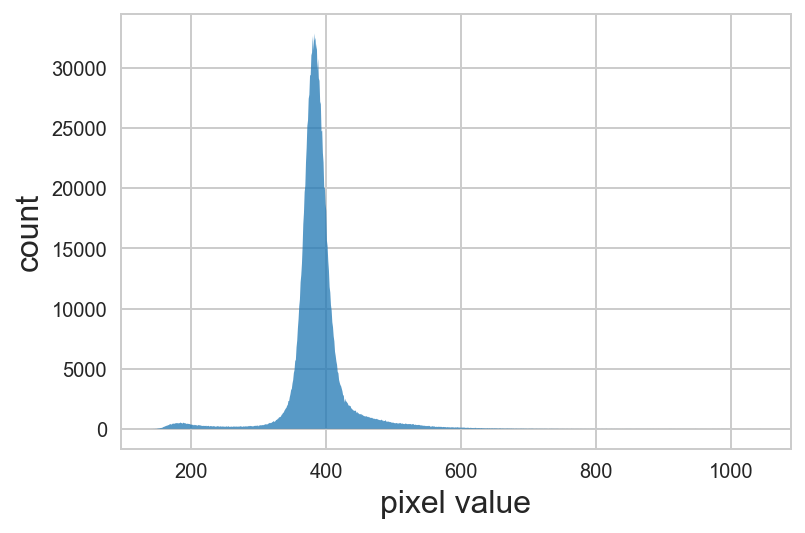

In [6]:
# Compute a histogram
hist_phase, bins_phase = skimage.exposure.histogram(im_phase)

# Use matplotlib to make a pretty plot of histogram data
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
_ = ax.fill_between(bins_phase, hist_phase, alpha=0.75)

Bimodal distribution.  Mosts pixels are background.  Phase contrast means background is bright.
Bacteria will be dark.  To isolate the bacteria, we can use thresholding like 300.

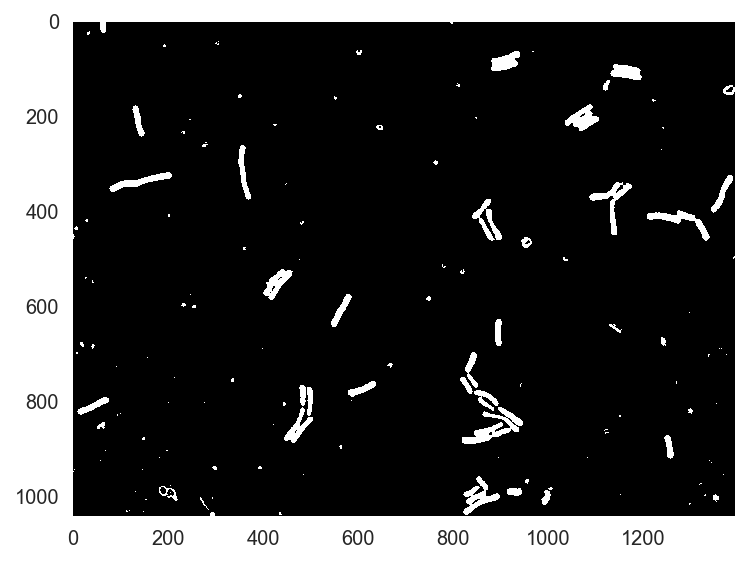

In [7]:
# Threshold value, as obtained by eye from graph
thresh_phase = 300
# Results in a black and white image.
im_phase_bw = im_phase < thresh_phase

# Look at it
with sns.axes_style('dark'):
    skimage.io.imshow(im_phase_bw)

/Users/StanHub/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


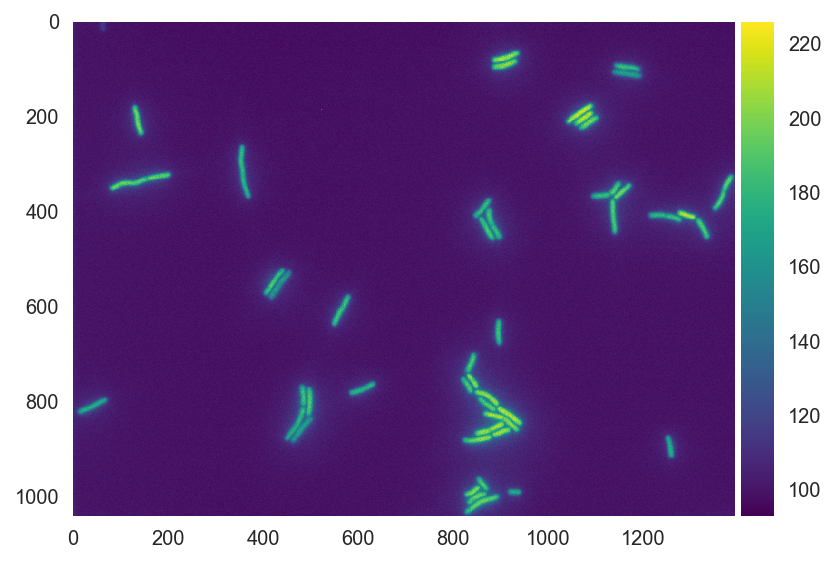

In [8]:
# Load the CFP image.
im_cfp = skimage.io.imread('data/bsub_100x_cfp.tif')

# Display the image, set Seaborn style 'dark' to avoid grid lines
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp)

/Users/StanHub/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


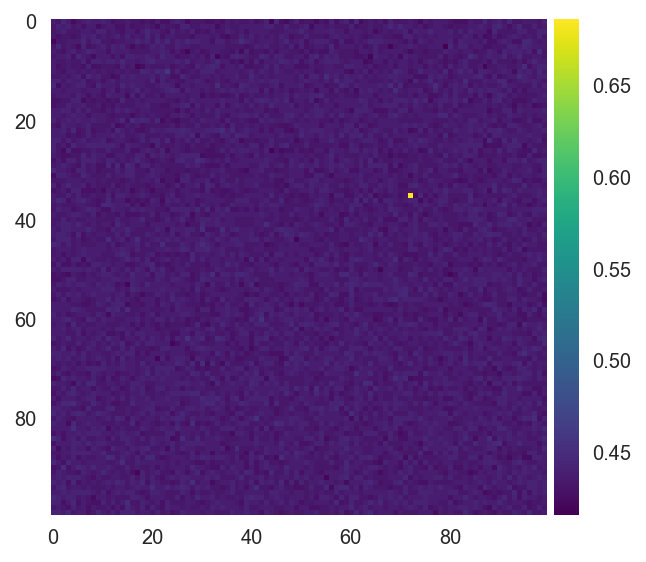

In [9]:
# There is a hot pixel here
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp[150:250,450:550] / im_cfp.max(), cmap=plt.cm.viridis)

/Users/StanHub/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


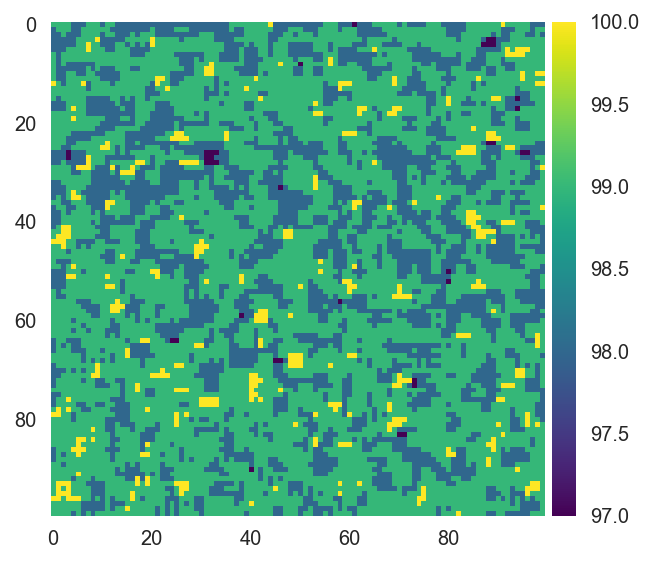

In [11]:
# Make a median filter.  Takes the median of the intensities inside a structuring element.

# Make the structuring element
selem = skimage.morphology.square(3)

# Perform the median filter
im_cfp_filt = skimage.filters.median(im_cfp, selem)

# Show filtered section with the viridis LUT.  They are very close together! No more hot pixel 
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp_filt[150:250,450:550], cmap=plt.cm.viridis)

/Users/StanHub/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


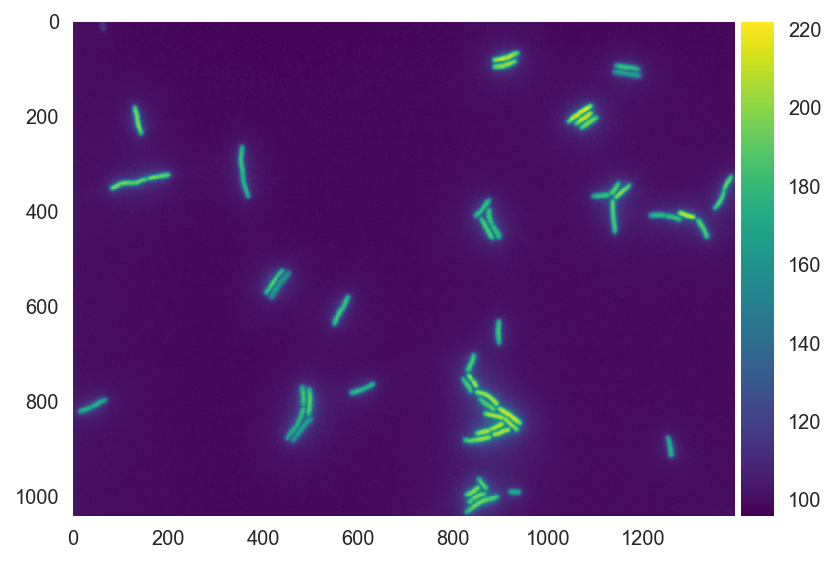

In [12]:
# Show filtered image with the viridis LUT. 
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp_filt, cmap=plt.cm.viridis)

In [14]:
# If we look at it, it is actually a numpy array
selem

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

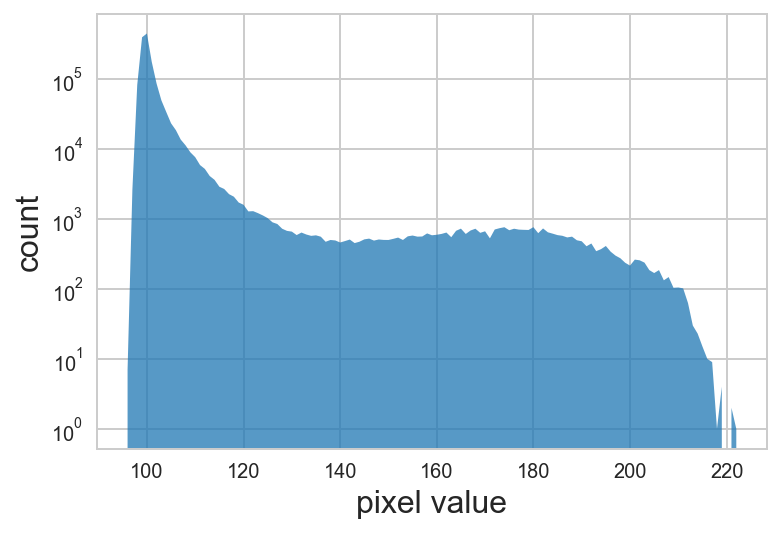

In [17]:
# Plot the histogram of this filtered image
hist_cfp, bins_cfp = skimage.exposure.histogram(im_cfp_filt)

# Use matplotlib to make a pretty plot of histogram data
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
# Bimodality can be revealed on log scale
ax.set_yscale('log')
_ = ax.fill_between(bins_cfp, hist_cfp, alpha=0.75)

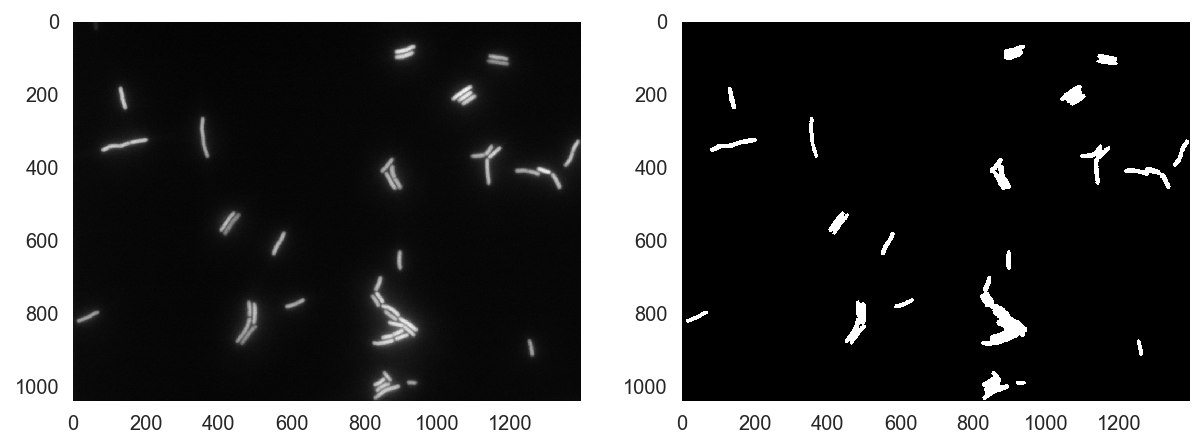

In [18]:
# Threshold value, as obtained by eye
thresh_cfp = 140

# Generate thresholded image
im_cfp_bw = im_cfp_filt > thresh_cfp

# Display phase and thresholded image
with sns.axes_style('dark'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(im_cfp_filt, cmap=plt.cm.gray)
    ax[1].imshow(im_cfp_bw, cmap=plt.cm.gray)


In [19]:
# Compute Otsu thresholds for phase and cfp
thresh_phase_otsu = skimage.filters.threshold_otsu(im_phase)
thresh_cfp_otsu = skimage.filters.threshold_otsu(im_cfp_filt)

# Compare results to eyeballing it
print('Phase by eye: ', thresh_phase, '   CFP by eye: ', thresh_cfp)
print('Phase by Otsu:', thresh_phase_otsu,   
      '   CFP by Otsu:', thresh_cfp_otsu)

Phase by eye:  300    CFP by eye:  140
Phase by Otsu: 437    CFP by Otsu: 135


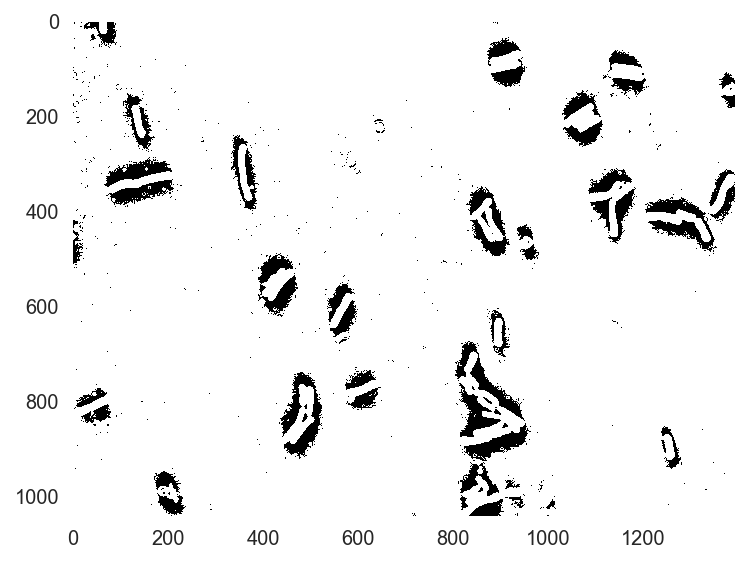

In [20]:
# Look at Otsu phase
im_phase_bw_otsu = im_phase < thresh_phase_otsu

with sns.axes_style('dark'):
    skimage.io.imshow(im_phase_bw_otsu)


It is clear that otsu method with phase creates halos.  Best bacterial imaging occurs with FPs

We see that for the CFP channel, the Otsu method did very well. However, for phase, we see a big difference. This is because the Otsu method assumes a bimodal distribution of pixels. If we look at the histograms on a log scale, we see more clearly that the phase image has a long tail, which will trip up the Otsu algorithm. The moral of the story is that you can use automated thresholding, but you should always do sanity checks to make sure it is working as expected.

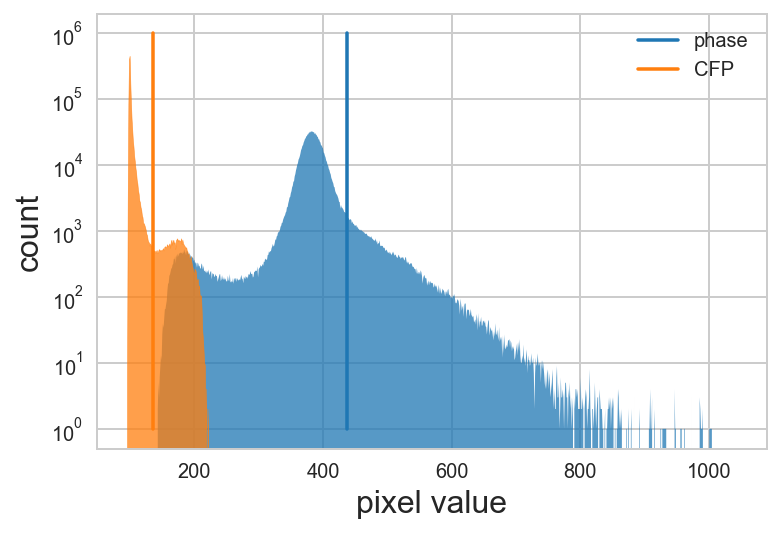

In [21]:
# Set up figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
ax.set_yscale('log')

# Histograms with thresholds
_ = ax.fill_between(bins_phase, hist_phase, alpha=0.75)
_ = ax.fill_between(bins_cfp, hist_cfp, alpha=0.75, color=colors[1])
_ = ax.plot([thresh_phase_otsu, thresh_phase_otsu], [1, 1e6], color=colors[0])
_ = ax.plot([thresh_cfp_otsu, thresh_cfp_otsu], [1, 1e6], color=colors[1])
ax.legend(('phase', 'CFP'), loc='upper right');

In [23]:
# Define interpixel distance
interpixel_dist = 0.063 # microns

In [26]:
# Get bacterial pixel area using bollean array image cfp_bw
bacterial_area_pix = np.sum(im_cfp_bw)

In [28]:
# Calculate area
bacterial_area_micron = bacterial_area_pix * interpixel_dist**2
print('bacterial area=', bacterial_area_micron, 'square microns')

bacterial area= 140.720895 square microns
